In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import functions as fun

[nltk_data] Downloading package punkt to /Users/marta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/marta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("data/DatasetFinal.csv", index_col=0)
df.head(2)

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100


In [3]:
df.shape

(8342, 13)

Hay algunos cursos que están duplicados con distinta Keyword (no seguían una regla concreta). Hemos ido comprobándolos en la página web de Coursera para poder limpiar y eliminar los que eran erróneos.
Hemos cambiado la keyword de alguno y borrado los que tenían errores

# 1.PREPROCESSING

* Remove hyperlinks or hashtags - We'll use the [re](https://docs.python.org/3/library/re.html)

* Tokenize the string - To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) module from NLTK allows us to do these easily

* Remove stop words and punctuations

* Stemming - NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) 

In [4]:
# Listados de ciencias y humanidades:
df_science = df[df["Keyword"] != "Arts and Humanities"]
df_humanities = df[df["Keyword"] == "Arts and Humanities"]

In [5]:
print(f"The size of the humanities dataframe is: {df_humanities["Course Title"].shape}")
print(f"The size of the science dataframe is: {df_science["Course Title"].shape}")

The size of the humanities dataframe is: (467,)
The size of the science dataframe is: (7875,)


In [6]:
row_humanities = list(df_humanities["Course Title"])
row_science = list(df_science["Course Title"][:476])
all_rows = (row_science) + (row_humanities)

In [7]:
print(type(all_rows), len(all_rows))

<class 'list'> 943


In [8]:
# Combination of humanities and science labels
y = np.append(np.ones((len(row_science), 1)), np.zeros((len(row_humanities), 1)), axis=0)

### Train test split: 20% will be in the test set, and 80% in the training set.

In [9]:
# Conjunto de entrenamiento
def get_data_train(title,label):
    # Obtenemos el 80% del conjunto de datos como conjunto de entrenamiento."
    train_x, test_x, train_y, test_y = train_test_split(title, label, test_size=0.20, random_state=42)

    return train_x, test_x, train_y, test_y

In [10]:
train_x, test_x, train_y, test_y = get_data_train(all_rows,y)
print(type(train_x), len(train_x), len(test_x))
print(type(test_y), len(train_y), len(test_y))

<class 'list'> 754 189
<class 'numpy.ndarray'> 754 189


### Word Count - frequency dictionary

In [11]:
# create frequency dictionary
freqs = fun.build_freqs(train_x, train_y)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 1359


In [12]:
# frequency dictionary
print(freqs)

{('creat', 1.0): 23, ('busi', 1.0): 292, ('model', 1.0): 19, ('canva', 1.0): 14, ('mural', 1.0): 1, ('intern', 1.0): 14, ('b2b', 1.0): 1, ('market', 1.0): 18, ('real-world', 1.0): 1, ('cloud', 1.0): 8, ('pm', 1.0): 1, ('1', 1.0): 4, ('3', 1.0): 1, ('technolog', 1.0): 4, ('success', 1.0): 9, ('pinterest', 1.0): 2, ('pin', 1.0): 1, ('valu', 1.0): 8, ('data', 1.0): 18, ('looker', 1.0): 2, ('日本語版', 1.0): 2, ('special', 1.0): 79, ('launch', 1.0): 5, ('your', 1.0): 11, ('onlin', 1.0): 4, ('strategi', 1.0): 28, ('foundat', 1.0): 15, ('introduct', 1.0): 14, ('financ', 1.0): 9, ('account', 1.0): 10, ('case', 1.0): 3, ('analysi', 1.0): 21, ('the', 0.0): 56, ('art', 0.0): 28, ('vocal', 0.0): 1, ('product', 0.0): 8, ('assess', 1.0): 2, ('analyt', 1.0): 26, ('measur', 1.0): 2, ('entrepreneurship', 1.0): 5, ('ii', 1.0): 8, ('first', 1.0): 1, ('step', 1.0): 1, ('make', 1.0): 9, ('sustain', 1.0): 7, ('basebal', 0.0): 3, ('american', 0.0): 6, ('do', 1.0): 6, ('china', 1.0): 2, ('capston', 1.0): 12, ('o

In [13]:
print(f"In science titles, 'science' is repeated {freqs[('scienc', 1.0)]} times")
print(f"In humanities titles, 'science' is repeated {freqs[('scienc', 0.0)]} time")

In science titles, 'science' is repeated 2 times
In humanities titles, 'science' is repeated 15 time


# 2. Frequency table: 
We will use this for our titles and len(freqs) = 1341

In [14]:
new_course = "Financial Markets"
p = fun.preprocessing(new_course)
print(p)

# list representing our table of word counts.
data = []

# loop through our selected words
for word in p:
    # initialize science and humanities counts
    sci = 0
    hum = 0
    # retrieve number of science counts
    if (word, 1) in freqs:
        sci = freqs[(word, 1)]
    # retrieve number of humanities counts
    if (word, 0) in freqs:
        hum = freqs[(word, 0)]
    # append the word counts to the table
    data.append([word, sci, hum])
    
data

['financi', 'market']


[['financi', 8, 0], ['market', 18, 1]]

## 3. Training Your Model

In [15]:
# Collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))

for i in range(len(train_x)):
    X[i, :] = fun.extract_features(train_x[i], freqs)

# Training labels corresponding to X
Y = train_y

In [16]:
X.shape

(754, 3)

Iteration 0: Cost = 0.3695666140500117
Iteration 1: Cost = 0.32486437007778296
Iteration 2: Cost = 0.2995205994962493
Iteration 3: Cost = 0.2828838627069439
Iteration 4: Cost = 0.27091500398883483
Iteration 5: Cost = 0.26176125406137307
Iteration 6: Cost = 0.2544509682364119
Iteration 7: Cost = 0.2484232664086327
Iteration 8: Cost = 0.24333034786743238
Iteration 9: Cost = 0.23894423108681603
Iteration 10: Cost = 0.23510868566840992
Iteration 11: Cost = 0.2317126723092135
Iteration 12: Cost = 0.22867482141609
Iteration 13: Cost = 0.22593393447727012
Iteration 14: Cost = 0.22344294169729306
Iteration 15: Cost = 0.22116492899726278
Iteration 16: Cost = 0.21907044965459319
Iteration 17: Cost = 0.21713565880198044
Iteration 18: Cost = 0.21534098966892504
Iteration 19: Cost = 0.2136701952755955
Iteration 20: Cost = 0.21210964208514296
Iteration 21: Cost = 0.2106477808140179
Iteration 22: Cost = 0.2092747440483361
Iteration 23: Cost = 0.20798203611512275
Iteration 24: Cost = 0.206762291080413

/Users/marta/Documents/a_Data Path/DATA_SCIENCE/3_Coursera_Project_INPROGRESS/Coursera_NLP/functions.py:105: RuntimeWarning: divide by zero encountered in log
  J = -1./m * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h)))


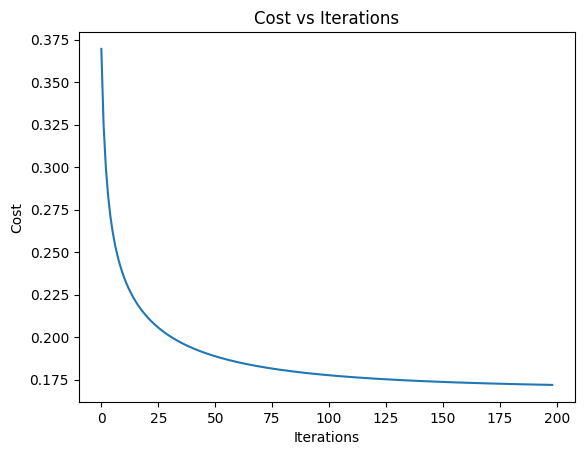

In [17]:
# Initialize arrays to store cost and iteration values
costs = []
iterations = []

# Initialize theta outside the loop
theta = np.zeros((3, 1))

# Apply gradient descent
for iteration in range(200):
    J, theta = fun.gradientDescent(X, Y, theta, 1e-5, 200)
    costs.append(J)
    iterations.append(iteration)
    print(f"Iteration {iteration}: Cost = {J}")

print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

# Plot cost vs iterations
plt.plot(iterations, costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()


In [18]:
df_train_x = pd.DataFrame(X)
df_train_x["type"] = train_y
df_train_x["course"] = train_x
df_train_x.set_index(["course"], inplace = True) 
df_train_x.rename(columns={0:"bias", 1:"scince", 2:"humanities"}, inplace = True)

df_train_x.head()

,bias,scince,humanities,type
course,,,,
Create a Business Model Canvas with Mural,1.0,349.0,9.0,1.0
International B2B (Business to Business) Marketing,1.0,617.0,9.0,1.0
Real-World Cloud PM 1 of 3: Cloud Business and Technology,1.0,319.0,8.0,1.0
Create Successful Pinterest Pins for Business in Canva,1.0,341.0,10.0,1.0
Creating a Business Value with Data and Looker 日本語版 Specialization,1.0,424.0,31.0,1.0


### 3.1. Prediction

In [19]:
new_course = "Sports Business Analysis"
#new_course = "Children in Primary Education" 
#new_course = "Writing the best essay for university interviews about education"

y_hat = fun.predict_title(new_course, freqs, theta)
if y_hat < 0.5:
    print(f"{y_hat} -> {new_course} is a course about humanities")
else:
    print(f"{y_hat} -> {new_course} is a course about science")

[[0.99999999]] -> Sports Business Analysis is a course about science


### 3.2 -  Checking the Performance using the Test Set
* Given the test data and the weights of the trained model, we calculate the accuracy of the logistic regression model. 

In [20]:
accuracy = fun.test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {accuracy:.4f}")

Logistic regression model's accuracy = 0.9683


In [21]:
# Error analysis
print('Label Predicted Course')
for x,y in zip(test_x,test_y):
    y_hat = fun.predict_title(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE row IS:', x)
        print('THE PROCESSED row IS:', fun.preprocessing(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(fun.preprocessing(x)).encode('ascii', 'ignore')))

Label Predicted Course
THE row IS: The Science of Success: What Researchers Know that You Should Know
THE PROCESSED row IS: ['the', 'scienc', 'success', 'what', 'research', 'know', 'you', 'should', 'know']
1	0.00000654	b'the scienc success what research know you should know'
THE row IS: Fundamentos de Finanzas Empresariales 
THE PROCESSED row IS: ['fundamento', 'finanza', 'empresarial']
1	0.49512371	b'fundamento finanza empresarial'


/var/folders/np/2h53vflx42jd3w_yxn33bvv40000gn/T/ipykernel_77994/2796818583.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(fun.preprocessing(x)).encode('ascii', 'ignore')))


THE row IS: Mercados financieros
THE PROCESSED row IS: ['mercado', 'financiero']
1	0.49512371	b'mercado financiero'
THE row IS: Corporate Sustainability. Understanding and Seizing the Strategic Opportunity 
THE PROCESSED row IS: ['corpor', 'sustain', 'understand', 'seiz', 'strateg', 'opportun']
1	0.20223192	b'corpor sustain understand seiz strateg opportun'
THE row IS: Become a Journalist: Report the News! Specialization
THE PROCESSED row IS: ['becom', 'journalist', 'report', 'new', 'special']
0	0.66920354	b'becom journalist report new special'
THE row IS: Teaching the Violin and Viola: Creating a Healthy Foundation
THE PROCESSED row IS: ['teach', 'violin', 'viola', 'creat', 'healthi', 'foundat']
0	0.74336658	b'teach violin viola creat healthi foundat'
